# Titanic - Machine Learning from Disaster

## Ensemble Adaboost Classifier

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,0
1,1,1,0,38.0,1,0,596,71.28,0,0
2,1,3,0,26.0,0,0,669,7.92,2,0
3,1,1,0,35.0,1,0,49,26.55,2,0
4,0,3,1,35.0,0,0,472,8.05,2,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,0
887,1,1,0,19.0,0,0,14,30.00,2,0
888,0,3,0,29.0,1,2,675,11.72,2,0
889,1,1,1,26.0,0,0,8,30.00,0,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived", "Age", "Fare"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 7), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 7), (223,))

## Modeling

In [8]:
from common import functions as func

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

**Getting Best Hyperparameter Optimization**

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [9]:
# clf = AdaBoostClassifier()

# space = dict()
# space['n_estimators'] = [n for n in range(500)]
# space['learning_rate'] = [n for n in np.arange(0.1, 1.0, 0.1)]

# # space['splitter'] = ["best", "random"]
# # # space['max_depth'] = [n for n in range(10)]
# # space['min_samples_split'] = [n for n in range(10)]
# # space['min_samples_leaf'] = [n for n in range(10)]

# func.show_best_hyperparameter_optimization(clf, space, X_train, y_train)


Best Score: 0.8263832353384593
Best Hyperparameters: {'learning_rate': 0.30000000000000004, 'n_estimators': 432}

**Building, train and predict model**

In [10]:
clf = AdaBoostClassifier(
    n_estimators=430,
    algorithm="SAMME.R",
    learning_rate=0.3,
)

_ = clf.fit(X_train, y_train)

__Check the most relevant features for the training model__

In [11]:
featimps = clf.feature_importances_
featimps
pctimps = list(map(lambda fi: round(fi * 100), featimps))

pd.DataFrame({
    "Features": X_train.columns, 
    "Relevance (%)": pctimps
})

,Features,Relevance (%)
0,Pclass,3
1,Sex,4
2,SibSp,3
3,Parch,1
4,Ticket,78
5,Embarked,1
6,AgeGroup,9


__Predict and show model result__

In [12]:
y_predict = clf.predict(X_test)
func.show_model_result(clf, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.84357542 0.80337079 0.83707865 0.79213483 0.82022472]
Mean = 0.82 / Standard Deviation = 0.02

Confunsion Matrix
----------------------------------------------------------------------
[[113  21]
 [ 19  70]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       134
           1       0.77      0.79      0.78        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223

----------------------------------------------------------------------
Accuracy: 0.82
Precicion: 0.77
Sensitivity aka Recall: 0.79
F1-Score: 0.78


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.81
----------------------------------------------------------------------


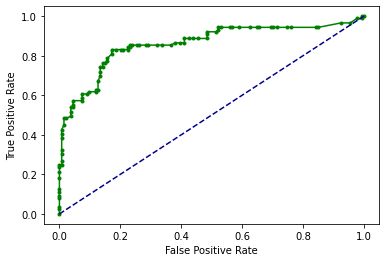

In [13]:
label = "AdaBoost"
func.show_curve_roc(clf, X_test, y_test, y_predict, label=label)

__Compare Ground Truth vs Prediction Model__

In [14]:
X_test_result = X_test.copy()
X_test_result["Ground Truth"] = y_test
X_test_result["Prediction"] = y_predict

In [15]:
X_test_result[X_test_result["Ground Truth"] != X_test_result["Prediction"]]

,Pclass,Sex,SibSp,Parch,Ticket,Embarked,AgeGroup,Ground Truth,Prediction
709,3,1,1,1,189,0,0,1,0
447,1,1,0,0,45,2,0,1,0
673,2,1,0,0,145,2,0,1,0
396,3,0,0,0,414,2,0,0,1
204,3,1,0,0,530,2,0,1,0
23,1,1,0,0,42,2,0,1,0
362,3,0,0,1,211,0,0,0,1
802,1,1,1,2,33,2,1,1,0
772,2,0,0,0,619,2,0,0,1
312,2,0,1,1,167,2,0,0,1
